<H1> Read and plot GPS data</H1>
<hr> 
<H2> Modificaiton History</H2>
27-May-24 CBL Original <br> 
<hr>
<H2> Use PANDAS to parse. </H2>
<a href="https://stackoverflow.com/questions/69432420/how-to-read-xml-file-into-pandas-dataframe"> XML Pandas </a>
<br> 
The data format is gpx which apparently is a standard built on top of xml. <a href='https://en.wikipedia.org/wiki/GPS_Exchange_Format'> GPS Exchange Format </a> <br> 
<a href = 'https://pypi.org/project/gpxpy/'> GPX library </a> <br> 
<a href = 'https://www.trackprofiler.com'> Example using GPXPY </a> <br> 
<a href = 'https://gis.stackexchange.com/questions/445063/group-and-plot-values-from-gpx-files-with-python'> Plotting </a> 
<br>

In [1]:
# library imports
import numpy as np
import matplotlib.pyplot as plt
import gpxpy
import gpxpy.gpx 
from datetime import date
from datetime import time
import pandas as pd
#import xml.etree.cElementTree as ET

In [3]:
#cols = ['time', 'lat', 'lon']
#df = pd.read_xml('/Users/clirakis/Documents/Personal/KaneAve/GPS/GPSKitData-2.gpx')
gpx_file = open('/Users/clirakis/Documents/Personal/KaneAve/GPS/GPSKitData-2.gpx')
gpx = gpxpy.parse(gpx_file)

for track in gpx.tracks:
    print(track)
    for segment in track.segments:
        print(segment)
        for point in segment.points:
            print(f'Point at ({point.latitude},{point.longitude}) -> {point.elevation}')

for waypoint in gpx.waypoints:
    print(f'waypoint {waypoint.name} -> ({waypoint.latitude},{waypoint.longitude})')

for route in gpx.routes:
    print('Route:')
    for point in route.points:
        print(f'Point at ({point.latitude},{point.longitude}) -> {point.elevtion}')

# There are many more utility methods and functions:
# You can manipulate/add/remove tracks, segments, points, waypoints and routes and
# get the GPX XML file from the resulting object:

#print('GPX:', gpx.to_xml())

GPXTrack(name='5/27/24, 1:09:07\u202fPM', segments=[GPXTrackSegment(points=[...])])
GPXTrackSegment(points=[...])
Point at (41.484795,-71.273876) -> 25.0
Point at (41.484764,-71.27392) -> 24.0
Point at (41.484751,-71.273985) -> 24.0
Point at (41.484747,-71.274046) -> 24.0
Point at (41.484741,-71.274114) -> 24.0
Point at (41.484733,-71.274181) -> 25.0
Point at (41.484729,-71.27424) -> 25.0
Point at (41.484725,-71.274307) -> 25.0
Point at (41.484724,-71.27438) -> 24.0
Point at (41.484699,-71.274443) -> 24.0
Point at (41.484707,-71.274507) -> 24.0
Point at (41.484702,-71.274565) -> 25.0
Point at (41.484658,-71.274581) -> 24.0
Point at (41.484608,-71.274558) -> 24.0
Point at (41.484556,-71.274551) -> 24.0
Point at (41.484502,-71.274542) -> 23.0
Point at (41.484451,-71.27453) -> 24.0
Point at (41.484411,-71.274509) -> 23.0
Point at (41.484431,-71.274441) -> 23.0
Point at (41.48444,-71.27438) -> 24.0
Point at (41.484454,-71.274323) -> 23.0
Point at (41.484468,-71.27426) -> 24.0
Point at (41.

In [25]:
# how to access points. 
print('Number of tracks: ', len(gpx.tracks))
segments = gpx.tracks[0].segments
print('Number of segments in first track: ', len(segments))
# assume one track and one segment
points = segments[0].points
print('Number of points in segment 0: ', len(points))
# time is a datetime object. 

Number of tracks:  1
Number of segments in first track:  1
Number of points in segment 0:  30


In [5]:
def load_points(filename):
    """
    filename - gpx file name that has points in it. 
    """
    gpx_file = open(filename)
    gpx = gpxpy.parse(gpx_file)
    # how to access points. 
    print('Number of tracks: ', len(gpx.tracks))
    segments = gpx.tracks[0].segments
    print('Number of segments in first track: ', len(segments))
    # assume one track and one segment
    segment = segments[0]
    points = segment.points
    print('Number of points in segment 0: ', len(points))
    # time is a datetime object. 
    # kind of put this into a pandas format. 
    run_data = []
    for point_idx, point in enumerate(points):
        run_data.append([point_idx, point.time, point.latitude, point.longitude,point.elevation, segment.get_speed(point_idx)]);

    return run_data

Number of tracks:  1
Number of segments in first track:  1
Number of points in segment 0:  284


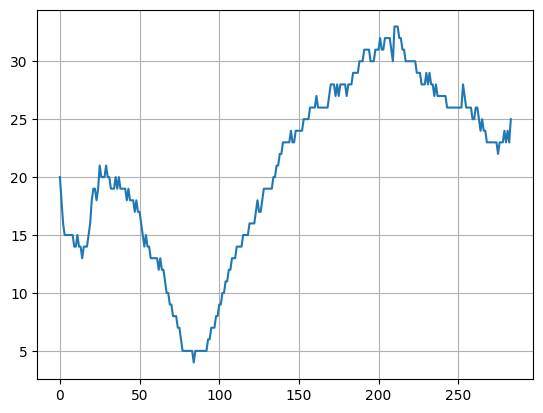

In [6]:
files = ['/Users/clirakis/Documents/Personal/KaneAve/GPS/GPSKitData.gpx', 
         '/Users/clirakis/Documents/Personal/KaneAve/GPS/GPSKitData-2.gpx',
         '/Users/clirakis/Documents/Personal/KaneAve/GPS/GPSKitData-3.gpx',
         '/Users/clirakis/Documents/Personal/KaneAve/GPS/GPSKitData240528.gpx']
data = load_points(files[0])
df   = pd.DataFrame(data,columns=['Index','Time', 'Latitude', 'Longitude', 'Elevation', 'Speed'])
# plot
figsize = (7, 3.5)
plt.plot(df['Index'],df['Elevation'])
plt.grid()

In [75]:
# export to csv
df.to_csv('gpskit.csv')
print(df)

     Index                             Time   Latitude  Longitude  Elevation  \
0        0 2024-05-27 16:43:18.999000+00:00  41.487026 -71.268819       20.0   
1        1 2024-05-27 16:43:25.002000+00:00  41.487011 -71.268751       18.0   
2        2 2024-05-27 16:43:32.008000+00:00  41.486984 -71.268694       16.0   
3        3 2024-05-27 16:43:35.999000+00:00  41.486971 -71.268633       15.0   
4        4 2024-05-27 16:43:41.003000+00:00  41.486964 -71.268568       15.0   
..     ...                              ...        ...        ...        ...   
279    279 2024-05-27 17:07:38.016000+00:00  41.485172 -71.273969       24.0   
280    280 2024-05-27 17:07:42.013000+00:00  41.485124 -71.273964       23.0   
281    281 2024-05-27 17:07:47.018000+00:00  41.485074 -71.273949       24.0   
282    282 2024-05-27 17:07:51.014000+00:00  41.485022 -71.273937       23.0   
283    283 2024-05-27 17:08:45.997000+00:00  41.484975 -71.273916       25.0   

        Speed  
0    1.039553  
1    0.

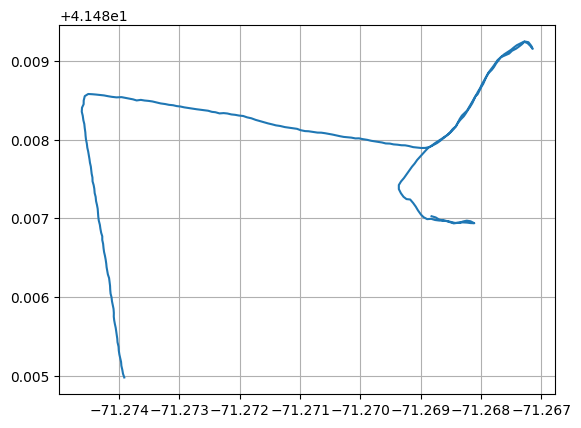

In [7]:
figsize = (7, 3.5)
plt.plot(df['Longitude'],df['Latitude'])
plt.grid()

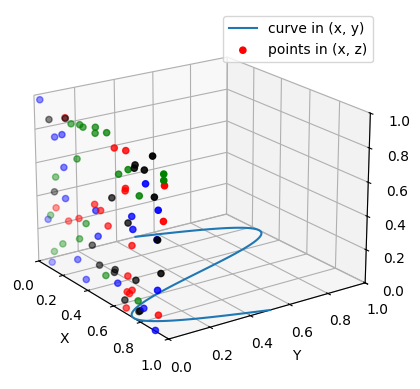

In [62]:
ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)

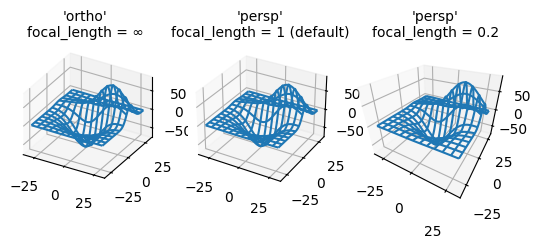

In [63]:
from mpl_toolkits.mplot3d import axes3d

fig, axs = plt.subplots(1, 3, subplot_kw={'projection': '3d'})

# Get the test data
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the data
for ax in axs:
    ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

# Set the orthographic projection.
axs[0].set_proj_type('ortho')  # FOV = 0 deg
axs[0].set_title("'ortho'\nfocal_length = ∞", fontsize=10)

# Set the perspective projections
axs[1].set_proj_type('persp')  # FOV = 90 deg
axs[1].set_title("'persp'\nfocal_length = 1 (default)", fontsize=10)

axs[2].set_proj_type('persp', focal_length=0.2)  # FOV = 157.4 deg
axs[2].set_title("'persp'\nfocal_length = 0.2", fontsize=10)

plt.show()

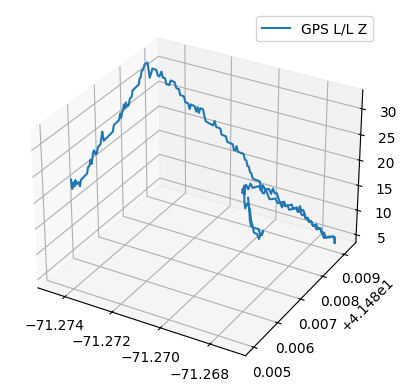

In [9]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(df['Longitude'],df['Latitude'], df['Elevation'], label='GPS L/L Z')
ax.legend()